In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
df = pd.read_csv('FlightDelays.csv',nrows=50000)

In [148]:
df=df.rename(columns={"DEST": "DESTINATION", "CRS_DEP_TIME": "SCHEDULED_DEPARTURE", "CRS_ARR_TIME":"SCHEDULED_ARRIVAL","DEP_TIME":"ACTUAL_DEPARTURE","ARR_TIME":"ACTUAL_ARRIVAL","DEP_DELAY_NEW":"DEPARTURE_DELAY","ARR_DELAY_NEW":"ARRIVAL_DELAY"})

In [149]:
df1 = df[['FL_DATE', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','SCHEDULED_DEPARTURE','ACTUAL_DEPARTURE','SCHEDULED_ARRIVAL','ACTUAL_ARRIVAL','DISTANCE','PASSENGERS','DEPARTURE_DELAY','ARRIVAL_DELAY','ARR_DEL15','TAXI_IN','TAXI_OUT']]

In [150]:
#dropping the columns which are object
df1 = df1.drop(['SCHEDULED_DEPARTURE','ACTUAL_DEPARTURE','SCHEDULED_ARRIVAL','ACTUAL_ARRIVAL'],axis=1)

In [151]:
df1 = df1[['ARR_DEL15', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','DISTANCE','PASSENGERS','TAXI_IN','TAXI_OUT']]

In [152]:
df1.columns

Index(['ARR_DEL15', 'DAY_OF_WEEK', 'CARRIER', 'FL_NUM', 'ORIGIN',
       'DESTINATION', 'Route', 'DISTANCE', 'PASSENGERS', 'TAXI_IN',
       'TAXI_OUT'],
      dtype='object')

In [153]:
#dropping rows with missing values
df1 = df1.dropna(subset =['ARR_DEL15'])

df1.isna().sum()

ARR_DEL15       0
DAY_OF_WEEK     0
CARRIER         0
FL_NUM          0
ORIGIN          0
DESTINATION     0
Route           0
DISTANCE        0
PASSENGERS     69
TAXI_IN         0
TAXI_OUT        0
dtype: int64

In [154]:
#dropping rows with missing values
df1 = df1.dropna(subset =['PASSENGERS'])
df1.isna().sum()

ARR_DEL15      0
DAY_OF_WEEK    0
CARRIER        0
FL_NUM         0
ORIGIN         0
DESTINATION    0
Route          0
DISTANCE       0
PASSENGERS     0
TAXI_IN        0
TAXI_OUT       0
dtype: int64

In [155]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df1.iloc[:,2] = labelencoder.fit_transform(df1.iloc[:,2].values)

In [156]:
print(df1['CARRIER'].unique())

[0 1]


In [157]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df1.iloc[:,4] = labelencoder.fit_transform(df1.iloc[:,4].values)
df1.iloc[:,5] = labelencoder.fit_transform(df1.iloc[:,5].values)

In [158]:
#Split the data into independent X and dependent Y values
X = df1.iloc[:,1:12].values
Y = df1.iloc[:,0].values

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [159]:
df1.dtypes

ARR_DEL15      float64
DAY_OF_WEEK      int64
CARRIER          int32
FL_NUM           int64
ORIGIN           int32
DESTINATION      int32
Route            int64
DISTANCE         int64
PASSENGERS     float64
TAXI_IN        float64
TAXI_OUT       float64
dtype: object

In [160]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
     #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return tree,forest

In [161]:
#Get and train all of the models
model = models(X_train,Y_train)

[5]Decision Tree Classifier Training Accuracy: 0.9983546617915905
[6]Random Forest Classifier Training Accuracy: 0.9773831287542439


In [162]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[6793 1178]
 [1034  568]]
Model[0] Testing Accuracy = "0.7689334586858874 !"

[[7764  207]
 [1245  357]]
Model[1] Testing Accuracy = "0.8483234095894704 !"



In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47863 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ARR_DEL15    47863 non-null  float64
 1   DAY_OF_WEEK  47863 non-null  int64  
 2   CARRIER      47863 non-null  int32  
 3   FL_NUM       47863 non-null  int64  
 4   ORIGIN       47863 non-null  int32  
 5   DESTINATION  47863 non-null  int32  
 6   Route        47863 non-null  int64  
 7   DISTANCE     47863 non-null  int64  
 8   PASSENGERS   47863 non-null  float64
 9   TAXI_IN      47863 non-null  float64
 10  TAXI_OUT     47863 non-null  float64
dtypes: float64(4), int32(3), int64(4)
memory usage: 3.8 MB


In [164]:

#Get the importance of the features
forest = model[1]
importances = pd.DataFrame({'feature':df1.iloc[:, 1:12].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TAXI_OUT,0.272
FL_NUM,0.166
TAXI_IN,0.163
DAY_OF_WEEK,0.085
PASSENGERS,0.073
Route,0.071
DISTANCE,0.070
DESTINATION,0.061
ORIGIN,0.036


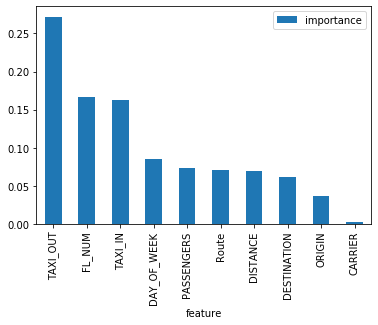

In [165]:

#Visualize the importance
importances.plot.bar()

In [41]:

#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)

#Print a space
print()

#Print the actual values
print(Y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [317]:
df11 = pd.read_csv('FlightDelays.csv',nrows=500000)

In [318]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'CARRIER', 'FL_NUM', 'Route', 'ORIGIN', 'DESTINATION', 'DEST_CITY',
       'DEST_STATE', 'SCHEDULED_DEPARTURE', 'ACTUAL_DEPARTURE', 'DEP_DELAY',
       'DEPARTURE_DELAY', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL',
       'ACTUAL_ARRIVAL', 'ARR_DELAY', 'ARRIVAL_DELAY', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELED', 'CANCELLATION_CODE',
       'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'PASSENGERS', 'EMPFULL',
       'EMPPART', 'EMPTOTAL', 'EMPFTE', 'NET_INCOME', 'OP_REVENUES'],
      dtype='object')

In [319]:
df2 =df11

In [320]:
df2['EMPFTE'] = df2['EMPFTE'].astype(float)

In [321]:
df2['YEAR'] = df2['YEAR'].astype(float)
df2['QUARTER'] = df2['QUARTER'].astype(float)
df2['MONTH'] = df2['MONTH'].astype(float)
df2['DAY_OF_MONTH'] = df2['DAY_OF_MONTH'].astype(float)
df2['YEAR'] = df2['YEAR'].astype(float)

In [322]:
df2['EMPTOTAL'] = df2['EMPTOTAL'].astype(float)
df2['EMPPART'] = df2['EMPPART'].astype(float)
df2['EMPFULL'] = df2['EMPFULL'].astype(float)

In [323]:
df2=df2.rename(columns={"DEST": "DESTINATION", "CRS_DEP_TIME": "SCHEDULED_DEPARTURE", "CRS_ARR_TIME":"SCHEDULED_ARRIVAL","DEP_TIME":"ACTUAL_DEPARTURE","ARR_TIME":"ACTUAL_ARRIVAL","DEP_DELAY_NEW":"DEPARTURE_DELAY","ARR_DELAY_NEW":"ARRIVAL_DELAY"})

In [324]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 50 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 500000 non-null  float64
 1   QUARTER              500000 non-null  float64
 2   MONTH                500000 non-null  float64
 3   DAY_OF_MONTH         500000 non-null  float64
 4   DAY_OF_WEEK          500000 non-null  int64  
 5   FL_DATE              500000 non-null  object 
 6   CARRIER              500000 non-null  object 
 7   FL_NUM               500000 non-null  int64  
 8   Route                500000 non-null  int64  
 9   ORIGIN               500000 non-null  object 
 10  DESTINATION          500000 non-null  object 
 11  DEST_CITY            500000 non-null  object 
 12  DEST_STATE           500000 non-null  object 
 13  SCHEDULED_DEPARTURE  500000 non-null  int64  
 14  ACTUAL_DEPARTURE     486008 non-null  float64
 15  DEP_DELAY        

In [325]:
#dropping the columns which are object
df2 = df2.drop(['SCHEDULED_DEPARTURE','ACTUAL_DEPARTURE','SCHEDULED_ARRIVAL','ACTUAL_ARRIVAL'],axis=1)

In [326]:
#df2 = df2[['ARR_DEL15', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','DISTANCE','PASSENGERS','TAXI_IN','TAXI_OUT','EMPFULL', 'EMPPART', 'EMPTOTAL',
  #     'EMPFTE', 'NET_INCOME', 'OP_REVENUES','YEAR','QUARTER','MONTH','DAY_OF_MONTH','YEAR','LATE_AIRCRAFT_DELAY','SECURITY_DELAY','NAS_DELAY','WEATHER_DELAY','CARRIER_DELAY','AIR_TIME','ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME','DIVERTED','CANCELED','ARR_DELAY_GROUP','WHEELS_OFF','WHEELS_ON']]

In [327]:
df2 = df2[['ARR_DEL15', 'DAY_OF_WEEK','CARRIER','FL_NUM','ORIGIN','DESTINATION','Route','DISTANCE','PASSENGERS','TAXI_IN','TAXI_OUT','EMPFULL', 'EMPPART', 'EMPTOTAL',
       'EMPFTE', 'NET_INCOME', 'OP_REVENUES','YEAR','QUARTER','MONTH','DAY_OF_MONTH','YEAR','AIR_TIME','ACTUAL_ELAPSED_TIME','CRS_ELAPSED_TIME','DIVERTED','CANCELED','WHEELS_OFF','WHEELS_ON']]

In [328]:
#dropping rows with missing values
df2 = df2.dropna(subset =['ARR_DEL15'])

df2.isna().sum()

ARR_DEL15                0
DAY_OF_WEEK              0
CARRIER                  0
FL_NUM                   0
ORIGIN                   0
DESTINATION              0
Route                    0
DISTANCE                 0
PASSENGERS             723
TAXI_IN                  0
TAXI_OUT                 0
EMPFULL                723
EMPPART                723
EMPTOTAL               723
EMPFTE                 723
NET_INCOME             723
OP_REVENUES            723
YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
YEAR                     0
AIR_TIME                 0
ACTUAL_ELAPSED_TIME      0
CRS_ELAPSED_TIME         0
DIVERTED                 0
CANCELED                 0
WHEELS_OFF               0
WHEELS_ON                0
dtype: int64

In [329]:
#dropping rows with missing values
df2 = df2.dropna(subset =['PASSENGERS'])
df2.isna().sum()

ARR_DEL15              0
DAY_OF_WEEK            0
CARRIER                0
FL_NUM                 0
ORIGIN                 0
DESTINATION            0
Route                  0
DISTANCE               0
PASSENGERS             0
TAXI_IN                0
TAXI_OUT               0
EMPFULL                0
EMPPART                0
EMPTOTAL               0
EMPFTE                 0
NET_INCOME             0
OP_REVENUES            0
YEAR                   0
QUARTER                0
MONTH                  0
DAY_OF_MONTH           0
YEAR                   0
AIR_TIME               0
ACTUAL_ELAPSED_TIME    0
CRS_ELAPSED_TIME       0
DIVERTED               0
CANCELED               0
WHEELS_OFF             0
WHEELS_ON              0
dtype: int64

In [330]:
#dropping rows with missing values
df2 = df2.dropna(subset =['CARRIER_DELAY'])
df2.isna().sum()

KeyError: ['CARRIER_DELAY']

In [331]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df2.iloc[:,2] = labelencoder.fit_transform(df2.iloc[:,2].values)

In [332]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df2.iloc[:,4] = labelencoder.fit_transform(df2.iloc[:,4].values)
df2.iloc[:,5] = labelencoder.fit_transform(df2.iloc[:,5].values)

In [333]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483634 entries, 0 to 499999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ARR_DEL15            483634 non-null  float64
 1   DAY_OF_WEEK          483634 non-null  int64  
 2   CARRIER              483634 non-null  int32  
 3   FL_NUM               483634 non-null  int64  
 4   ORIGIN               483634 non-null  int32  
 5   DESTINATION          483634 non-null  int32  
 6   Route                483634 non-null  int64  
 7   DISTANCE             483634 non-null  int64  
 8   PASSENGERS           483634 non-null  float64
 9   TAXI_IN              483634 non-null  float64
 10  TAXI_OUT             483634 non-null  float64
 11  EMPFULL              483634 non-null  float64
 12  EMPPART              483634 non-null  float64
 13  EMPTOTAL             483634 non-null  float64
 14  EMPFTE               483634 non-null  float64
 15  NET_INCOME       

In [334]:
#Split the data into independent X and dependent Y values
X = df2.iloc[:,1:30].values
Y = df2.iloc[:,0].values

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

#Scale the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [343]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
     #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return tree,forest

In [344]:
#Get and train all of the models
model = models(X_train,Y_train)

[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9982838253120259


In [339]:
#Show the confusion matrix and accuracy for all of the models on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  #extracting true_positives, false_positives, true_negatives, false_negatives
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  print(cm)
  print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[69949  9641]
 [ 9423  7714]]
Model[0] Testing Accuracy = "0.8029092187290002 !"

[[77948  1642]
 [11218  5919]]
Model[1] Testing Accuracy = "0.8670484973171917 !"



In [340]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483634 entries, 0 to 499999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ARR_DEL15            483634 non-null  float64
 1   DAY_OF_WEEK          483634 non-null  int64  
 2   CARRIER              483634 non-null  int32  
 3   FL_NUM               483634 non-null  int64  
 4   ORIGIN               483634 non-null  int32  
 5   DESTINATION          483634 non-null  int32  
 6   Route                483634 non-null  int64  
 7   DISTANCE             483634 non-null  int64  
 8   PASSENGERS           483634 non-null  float64
 9   TAXI_IN              483634 non-null  float64
 10  TAXI_OUT             483634 non-null  float64
 11  EMPFULL              483634 non-null  float64
 12  EMPPART              483634 non-null  float64
 13  EMPTOTAL             483634 non-null  float64
 14  EMPFTE               483634 non-null  float64
 15  NET_INCOME       

In [341]:
#Get the importance of the features
forest = model[1]
importances = pd.DataFrame({'feature':df2.iloc[:, 1:30].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TAXI_OUT,0.120
WHEELS_OFF,0.100
WHEELS_ON,0.095
DAY_OF_MONTH,0.071
ACTUAL_ELAPSED_TIME,0.067
FL_NUM,0.062
AIR_TIME,0.059
CRS_ELAPSED_TIME,0.057
TAXI_IN,0.055


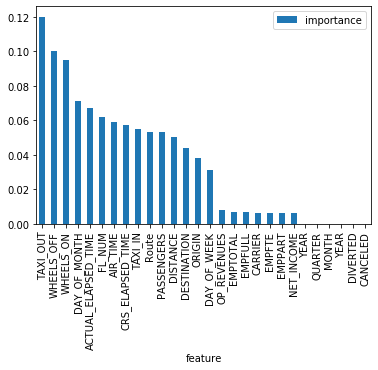

In [342]:

#Visualize the importanceb
importances.plot.bar()